# *Assignment 1:*  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy import sparse
import scipy.io
from scipy.io import mmread

**Q1.** Download preprocessed single-cell gene expression data for ~4K PBMCs (peripheral blood cells) from a healthy donor.

In [2]:
grch38_mtx = mmread('GRCh38/matrix.mtx')
grch38_mtx

<33694x4340 sparse matrix of type '<class 'numpy.int64'>'
	with 5727695 stored elements in COOrdinate format>

In [3]:
import csv
grch38_barcodes = 'GRCh38/barcodes.tsv'
grch38_genes = 'GRCh38/genes.tsv'

barcodes = [row[0] for row in csv.reader(open(grch38_barcodes), delimiter="\t")]  
genes = [row[1].upper() for row in csv.reader(open(grch38_genes), delimiter="\t")]

** Q1a. ** Load the above data and construct a dense matrix of genes by cell from the sparse list format.  What is the shape of the matrix, how many cells and genes are detected? [15 pts]

In [4]:
grch38_dense=grch38_mtx.toarray()

In [5]:
type(grch38_dense)
grch38_dense.shape
# 22694 rows (genes), 4,340 columns (barcodes)
# mad zeros

(33694, 4340)

In [6]:
grch38_df = pd.DataFrame(data=grch38_dense,index=genes, columns=barcodes)
grch38_df.head()

AAACCTGAGAAGGCCT-1  AAACCTGAGACAGACC-1  AAACCTGAGATAGTCA-1  \
RP11-34P13.3                   0                   0                   0   
FAM138A                        0                   0                   0   
OR4F5                          0                   0                   0   
RP11-34P13.7                   0                   0                   0   
RP11-34P13.8                   0                   0                   0   

              AAACCTGAGCGCCTCA-1  AAACCTGAGGCATGGT-1  AAACCTGCAAGGTTCT-1  \
RP11-34P13.3                   0                   0                   0   
FAM138A                        0                   0                   0   
OR4F5                          0                   0                   0   
RP11-34P13.7                   0                   0                   0   
RP11-34P13.8                   0                   0                   0   

              AAACCTGCAGGATTGG-1  AAACCTGCAGGCGATA-1  AAACCTGCATCCCATC-1  \
RP11-34P13.3                   0                   0                   0   
FAM138A                        0                   0                   0   
OR4F5                          0                   0                   0   
RP11-34P13.7                   0                   0                   0   
RP11-34P13.8                   0                   0                   0   

              AAACCTGCATGAAGTA-1  ...  TTTGGTTCACTTAAGC-1  TTTGGTTCAGGACGTA-1  \
RP11-34P13.3                   0  ...                   0                   0   
FAM138A                        0  ...                   0                   0   
OR4F5                          0  ...                   0                   0   
RP11-34P13.7                   0  ...                   0                   0   
RP11-34P13.8                   0  ...                   0                   0   

              TTTGGTTCATGCCTAA-1  TTTGGTTCATTGGCGC-1  TTTGGTTGTTATCACG-1  \
RP11-34P13.3                   0                   0                   0   
FAM138A                        0                   0                   0   
OR4F5                          0                   0                   0   
RP11-34P13.7                   0                   0                   0   
RP11-34P13.8                   0                   0                   0   

              TTTGGTTTCGCTAGCG-1  TTTGTCACACTTAACG-1  TTTGTCACAGGTCCAC-1  \
RP11-34P13.3                   0                   0                   0   
FAM138A                        0                   0                   0   
OR4F5                          0                   0                   0   
RP11-34P13.7                   0                   0                   0   
RP11-34P13.8                   0                   0                   0   

              TTTGTCAGTTAAGACA-1  TTTGTCATCCCAAGAT-1  
RP11-34P13.3                   0                   0  
FAM138A                        0                   0  
OR4F5                          0                   0  
RP11-34P13.7                   0                   0  
RP11-34P13.8                   0                   0  

[5 rows x 4340 columns]

In [7]:
# let's get the library size un-transformed first

# Find the sum of each column(cells)
library_size = np.sum(grch38_df, axis=0)

# Find the sum of each row (genes)
gene_sums = np.sum(grch38_df,axis=1) # don't need actually

**Q1b.** Plot a histogram of log10 of library size (i.e. total counts per cell). Do you think the data
requires filtering of cell barcodes? If yes, how does the histogram look like after filtering? What
is the median of library size across all cells after any filtering [10 pts]?

Text(0.5, 1.0, 'Distribution of total UMIs (log x-formed)')

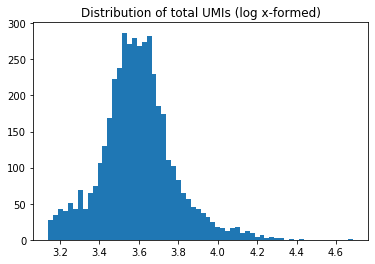

In [9]:
# so this is the log transform of the _untransformed_ library_sizes
plt.hist(np.log10(library_size), bins = 'auto')
plt.title('Distribution of total UMIs (log x-formed)')

In [10]:
# looks normal enough (but idk)
# lets get the median library size
np.median(library_size)

3866.5

In [11]:
# while we're at it, lets get the summary stats
library_size.describe()

count     4340.000000
mean      4349.037788
std       2352.224501
min       1386.000000
25%       3070.750000
50%       3866.500000
75%       4906.250000
max      48443.000000
dtype: float64

**Q1c.** Plot a histogram of log10 of the total number cells that each gene is expressed in. Is this
distribution unimodal or multimodal? If the latter, how many genes remain if you filter the lower
mode as noisy genes [5 pts]?

In [12]:
# Plot a histogram of log10 of the total number cells that each gene is expressed in.

# So, if each column is a cell (bio cell), then it doesn't matter
# is a cell (matrix) is 1 or 10. If it's non-zero than it's expressed
# So if it's a simple count of number of cells it's expressed in, isn't
# it a count of number of times each column value in a row is > 0?

#
# MT-CYB
# AAACCTGAGACAGACC-1
# 14
# let's assume, for now, that's the case, o sea, _not_ gene_sums

# aight, so `(grch38_df>0)` returns True when it's greater than 0
# `astype` (casting) will convert Trues to 1 and Falses to 0 aka binarizing the data.
# So a sum will count the number of instances (in each row/gene)
# where expression (no matter the degree) occurs
num_expressions_each_gene = (grch38_df>0).astype(int).sum(axis=1)


Text(0.5, 1.0, 'Distribution of number of expressions of each gene (log x-formed)')

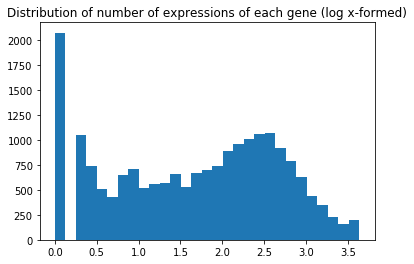

In [13]:
type(num_expressions_each_gene)

# below takes the zeros out
no_zeros_num_expressions_each_gene = num_expressions_each_gene[num_expressions_each_gene!=0]

plt.hist(np.log10(no_zeros_num_expressions_each_gene), bins = 'auto')
plt.title('Distribution of number of expressions of each gene (log x-formed)')

Text(0.5, 1.0, 'Distribution of number of expressions of each gene (log x-formed AND FILTERED)')

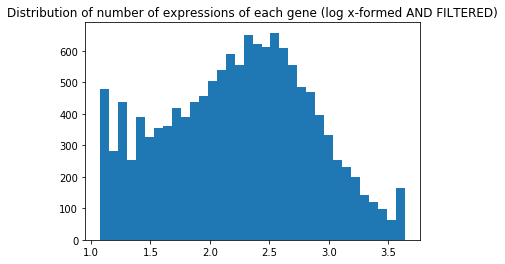

In [14]:
# um, looks bi-modal to me idk
no_zeros_num_expressions_each_gene.describe()

# arbitrary lower bound set at 11 expressions
tmp = no_zeros_num_expressions_each_gene[no_zeros_num_expressions_each_gene>11]

plt.hist(np.log10(tmp), bins = 'auto')
plt.title('Distribution of number of expressions of each gene (log x-formed AND FILTERED)')

# Q2 Normalize and visualize the data

**Q2a** Normalize the data with global scaling to the median library size.

In [15]:
#library_size # col sum

# another way to get column sums
# grch38_df.sum(axis=0)

normed = grch38_df.div(grch38_df.sum(axis=0), axis=1) * library_size.median()



In [16]:
normed

AAACCTGAGAAGGCCT-1  AAACCTGAGACAGACC-1  AAACCTGAGATAGTCA-1  \
RP11-34P13.3                 0.0                 0.0                 0.0   
FAM138A                      0.0                 0.0                 0.0   
OR4F5                        0.0                 0.0                 0.0   
RP11-34P13.7                 0.0                 0.0                 0.0   
RP11-34P13.8                 0.0                 0.0                 0.0   
...                          ...                 ...                 ...   
AC233755.2                   0.0                 0.0                 0.0   
AC233755.1                   0.0                 0.0                 0.0   
AC240274.1                   0.0                 0.0                 0.0   
AC213203.1                   0.0                 0.0                 0.0   
FAM231B                      0.0                 0.0                 0.0   

              AAACCTGAGCGCCTCA-1  AAACCTGAGGCATGGT-1  AAACCTGCAAGGTTCT-1  \
RP11-34P13.3                 0.0                 0.0                 0.0   
FAM138A                      0.0                 0.0                 0.0   
OR4F5                        0.0                 0.0                 0.0   
RP11-34P13.7                 0.0                 0.0                 0.0   
RP11-34P13.8                 0.0                 0.0                 0.0   
...                          ...                 ...                 ...   
AC233755.2                   0.0                 0.0                 0.0   
AC233755.1                   0.0                 0.0                 0.0   
AC240274.1                   0.0                 0.0                 0.0   
AC213203.1                   0.0                 0.0                 0.0   
FAM231B                      0.0                 0.0                 0.0   

              AAACCTGCAGGATTGG-1  AAACCTGCAGGCGATA-1  AAACCTGCATCCCATC-1  \
RP11-34P13.3                 0.0                 0.0                 0.0   
FAM138A                      0.0                 0.0                 0.0   
OR4F5                        0.0                 0.0                 0.0   
RP11-34P13.7                 0.0                 0.0                 0.0   
RP11-34P13.8                 0.0                 0.0                 0.0   
...                          ...                 ...                 ...   
AC233755.2                   0.0                 0.0                 0.0   
AC233755.1                   0.0                 0.0                 0.0   
AC240274.1                   0.0                 0.0                 0.0   
AC213203.1                   0.0                 0.0                 0.0   
FAM231B                      0.0                 0.0                 0.0   

              AAACCTGCATGAAGTA-1  ...  TTTGGTTCACTTAAGC-1  TTTGGTTCAGGACGTA-1  \
RP11-34P13.3                 0.0  ...                 0.0                 0.0   
FAM138A                      0.0  ...                 0.0                 0.0   
OR4F5                        0.0  ...                 0.0                 0.0   
RP11-34P13.7                 0.0  ...                 0.0                 0.0   
RP11-34P13.8                 0.0  ...                 0.0                 0.0   
...                          ...  ...                 ...                 ...   
AC233755.2                   0.0  ...                 0.0                 0.0   
AC233755.1                   0.0  ...                 0.0                 0.0   
AC240274.1                   0.0  ...                 0.0                 0.0   
AC213203.1                   0.0  ...                 0.0                 0.0   
FAM231B                      0.0  ...                 0.0                 0.0   

              TTTGGTTCATGCCTAA-1  TTTGGTTCATTGGCGC-1  TTTGGTTGTTATCACG-1  \
RP11-34P13.3                 0.0                 0.0                 0.0   
FAM138A                      0.0                 0.0                 0.0   
OR4F5                        0.0                 0.0                 0.0  

In [18]:
import scanpy as sc
import umap as UMAP


In [19]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0


In [20]:
results_file = 'write/grch38.h5ad'  # the file that will store the analysis results

In [21]:
adata = sc.read_10x_mtx(
    'GRCh38',                                # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [22]:
adata.var_names_make_unique() 

In [23]:
adata

AnnData object with n_obs × n_vars = 4340 × 33694
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


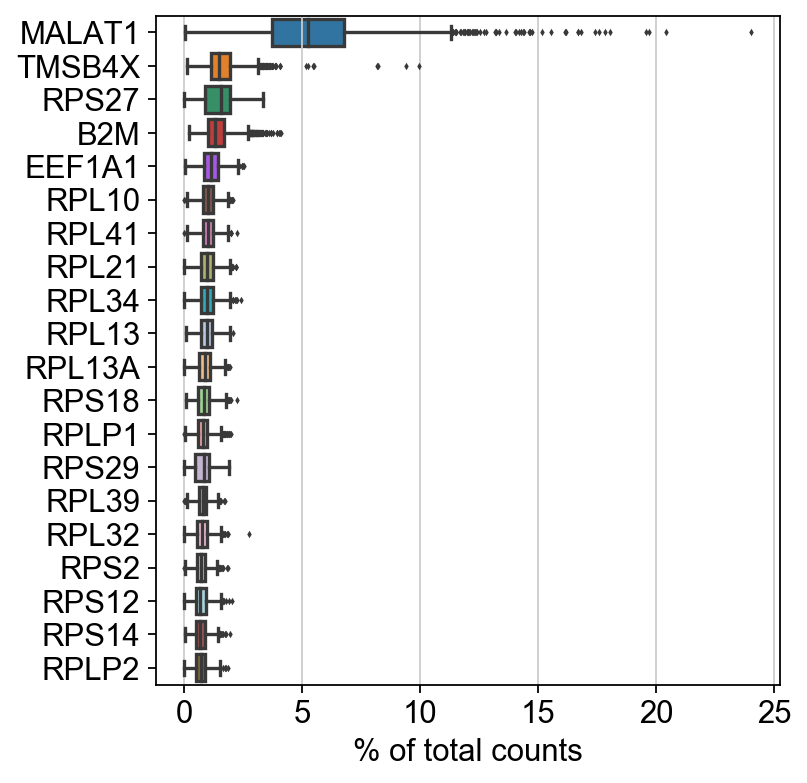

In [24]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [25]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 17039 genes that are detected in less than 3 cells


In [26]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

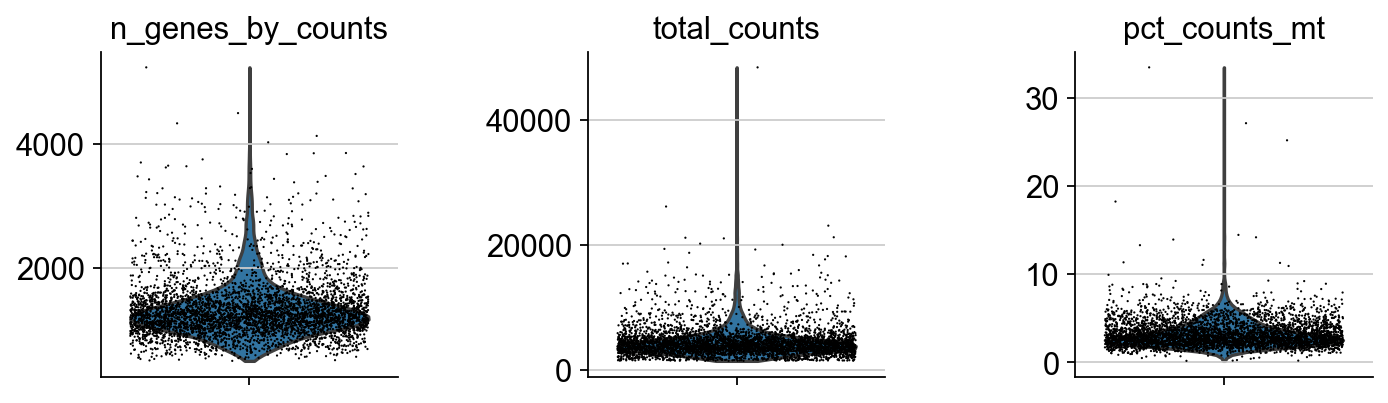

In [27]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

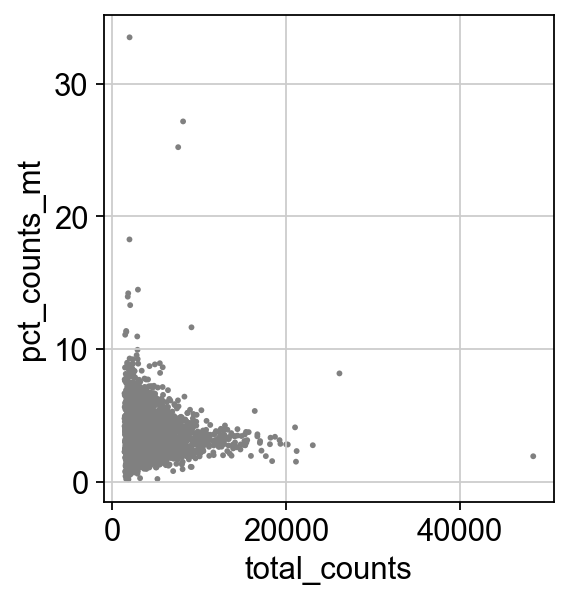

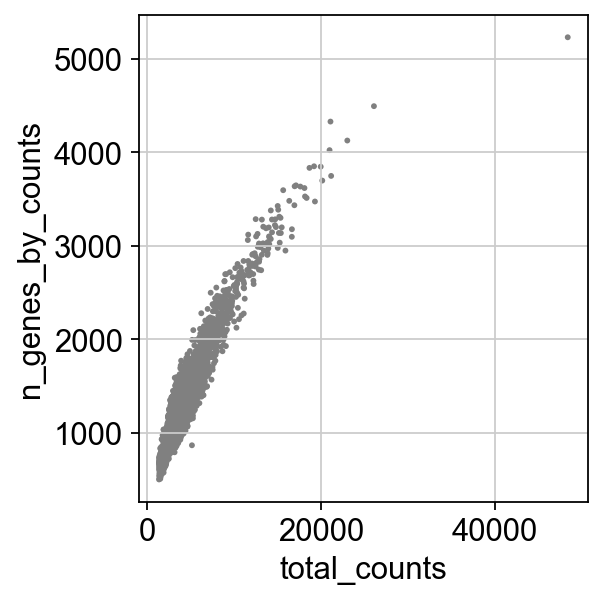

In [28]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [29]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell


/Users/kathrynwhyte/opt/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [31]:
sc.pp.log1p(adata)

In [33]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


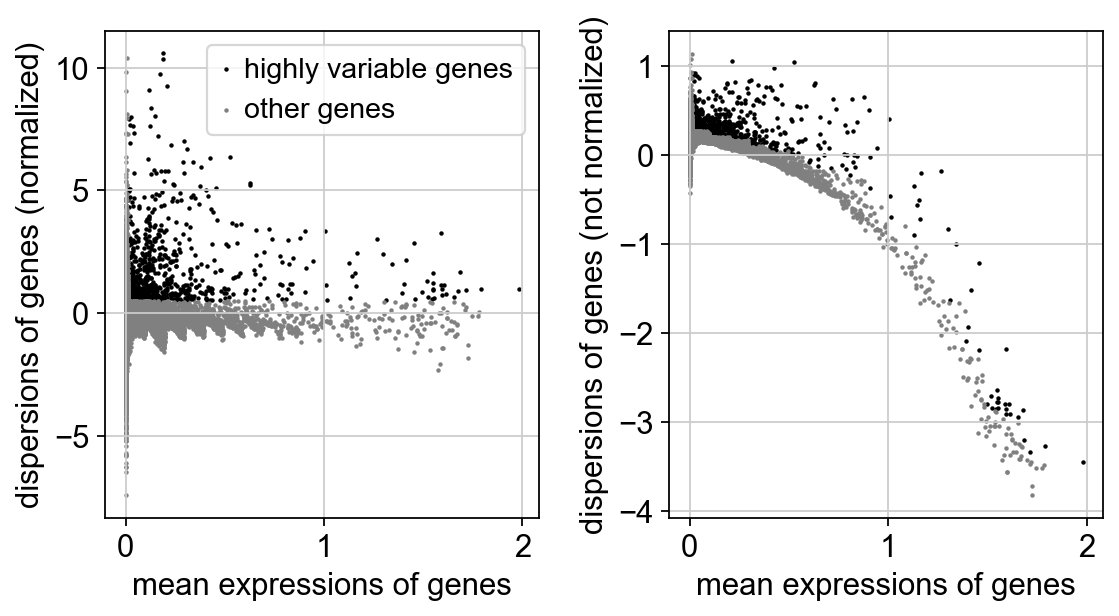

In [34]:
sc.pl.highly_variable_genes(adata)

** Q2b** Embed the normalized data to 2D using t-SNE or Umap or any other dimensionality reduction method. Justify your method of choice 

In [35]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


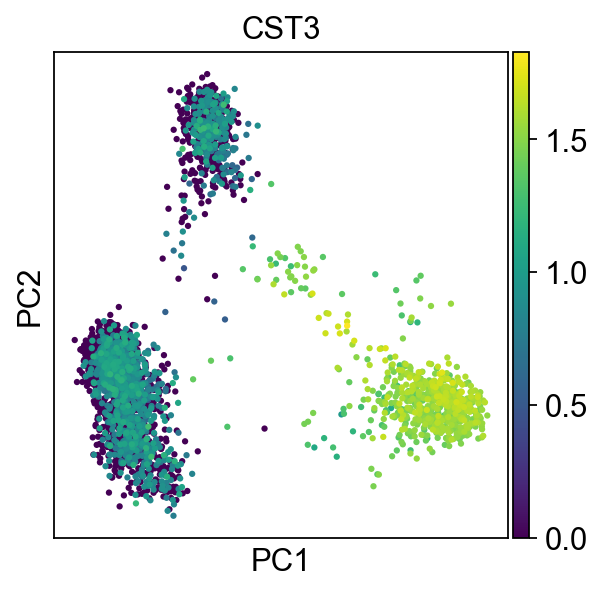

In [36]:
sc.pl.pca(adata, color='CST3')

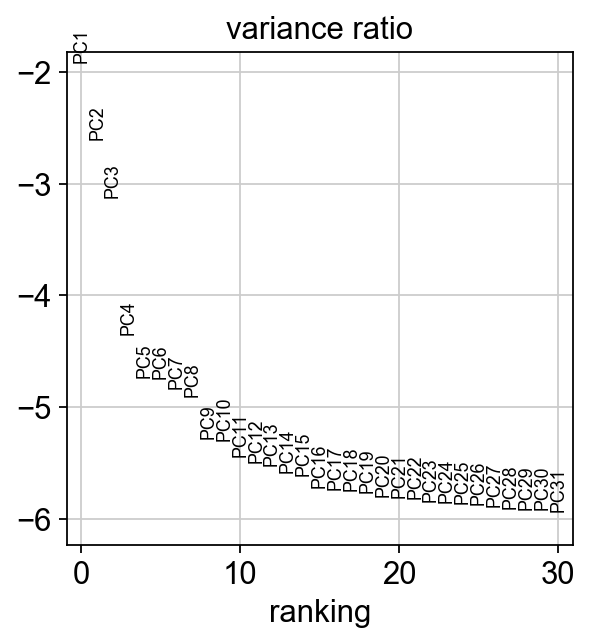

In [37]:
sc.pl.pca_variance_ratio(adata, log=True)

In [39]:
adata

AnnData object with n_obs × n_vars = 3730 × 16655
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [40]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [42]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


 Q2c Color cells in the embedded 2D map by log10 of library size. Interpret the plot

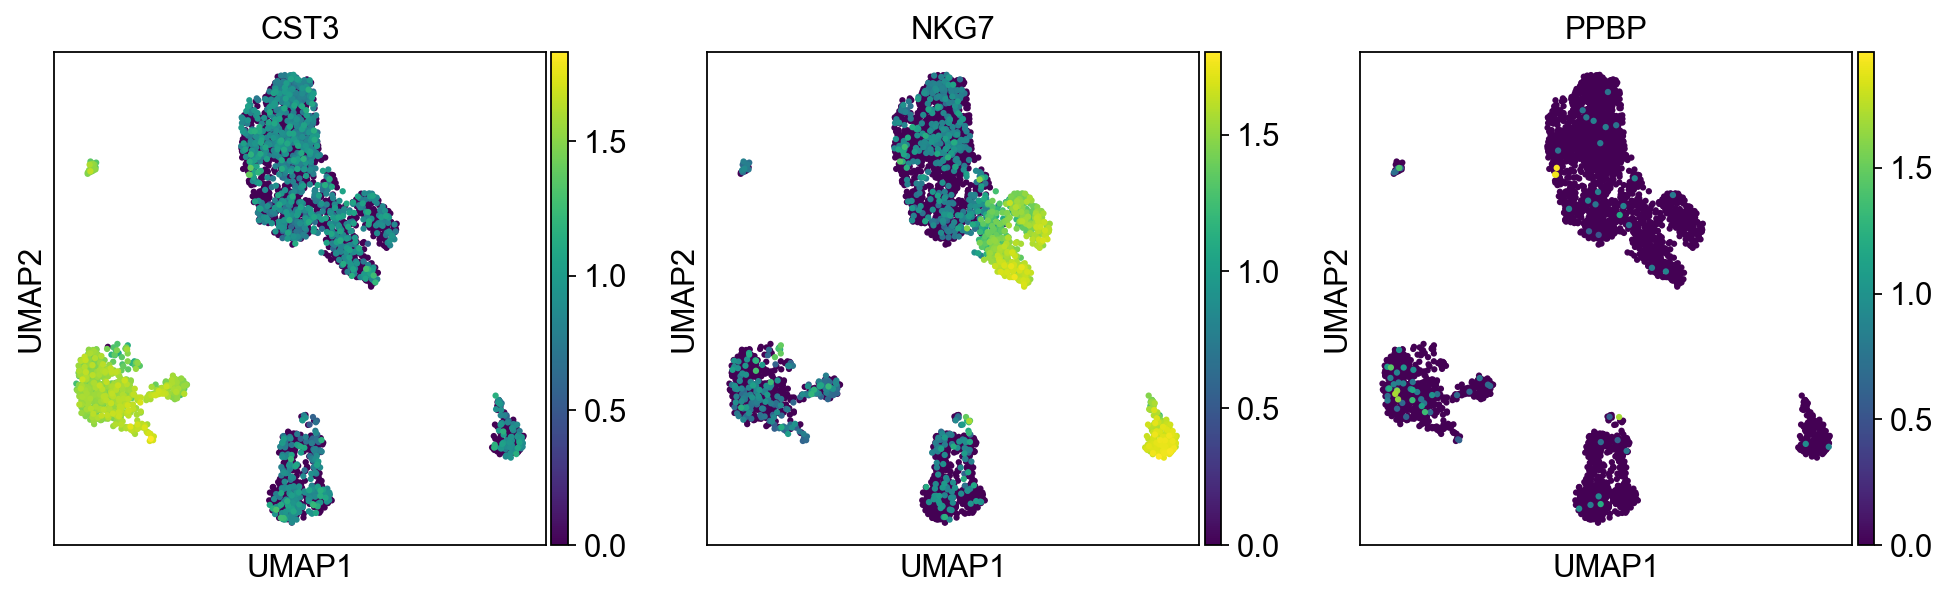

In [43]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

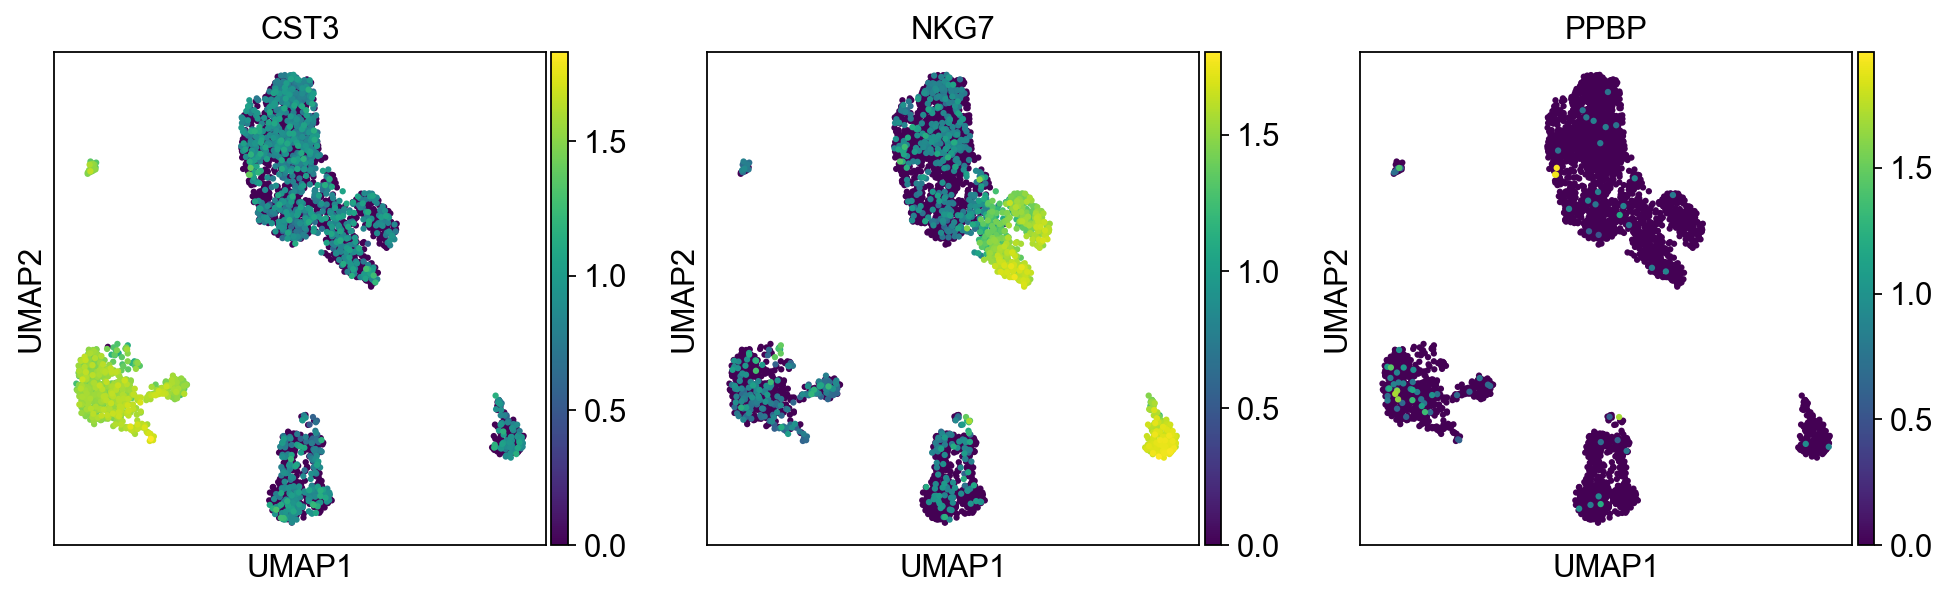

In [44]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [46]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


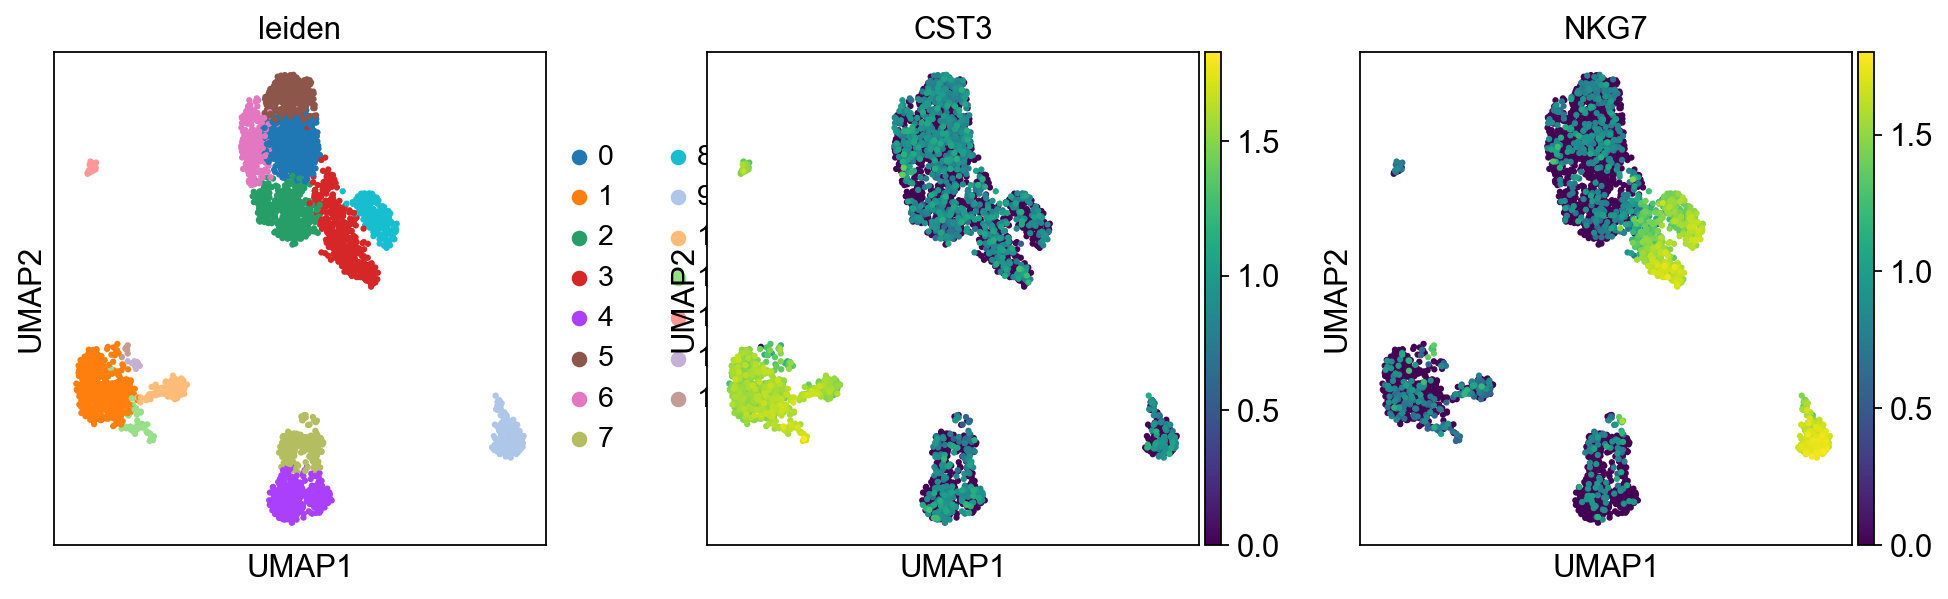

In [47]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

Q2d Color cells in the 2D map by normalized expression of major immune cell markers. Which cell types can you detect?

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


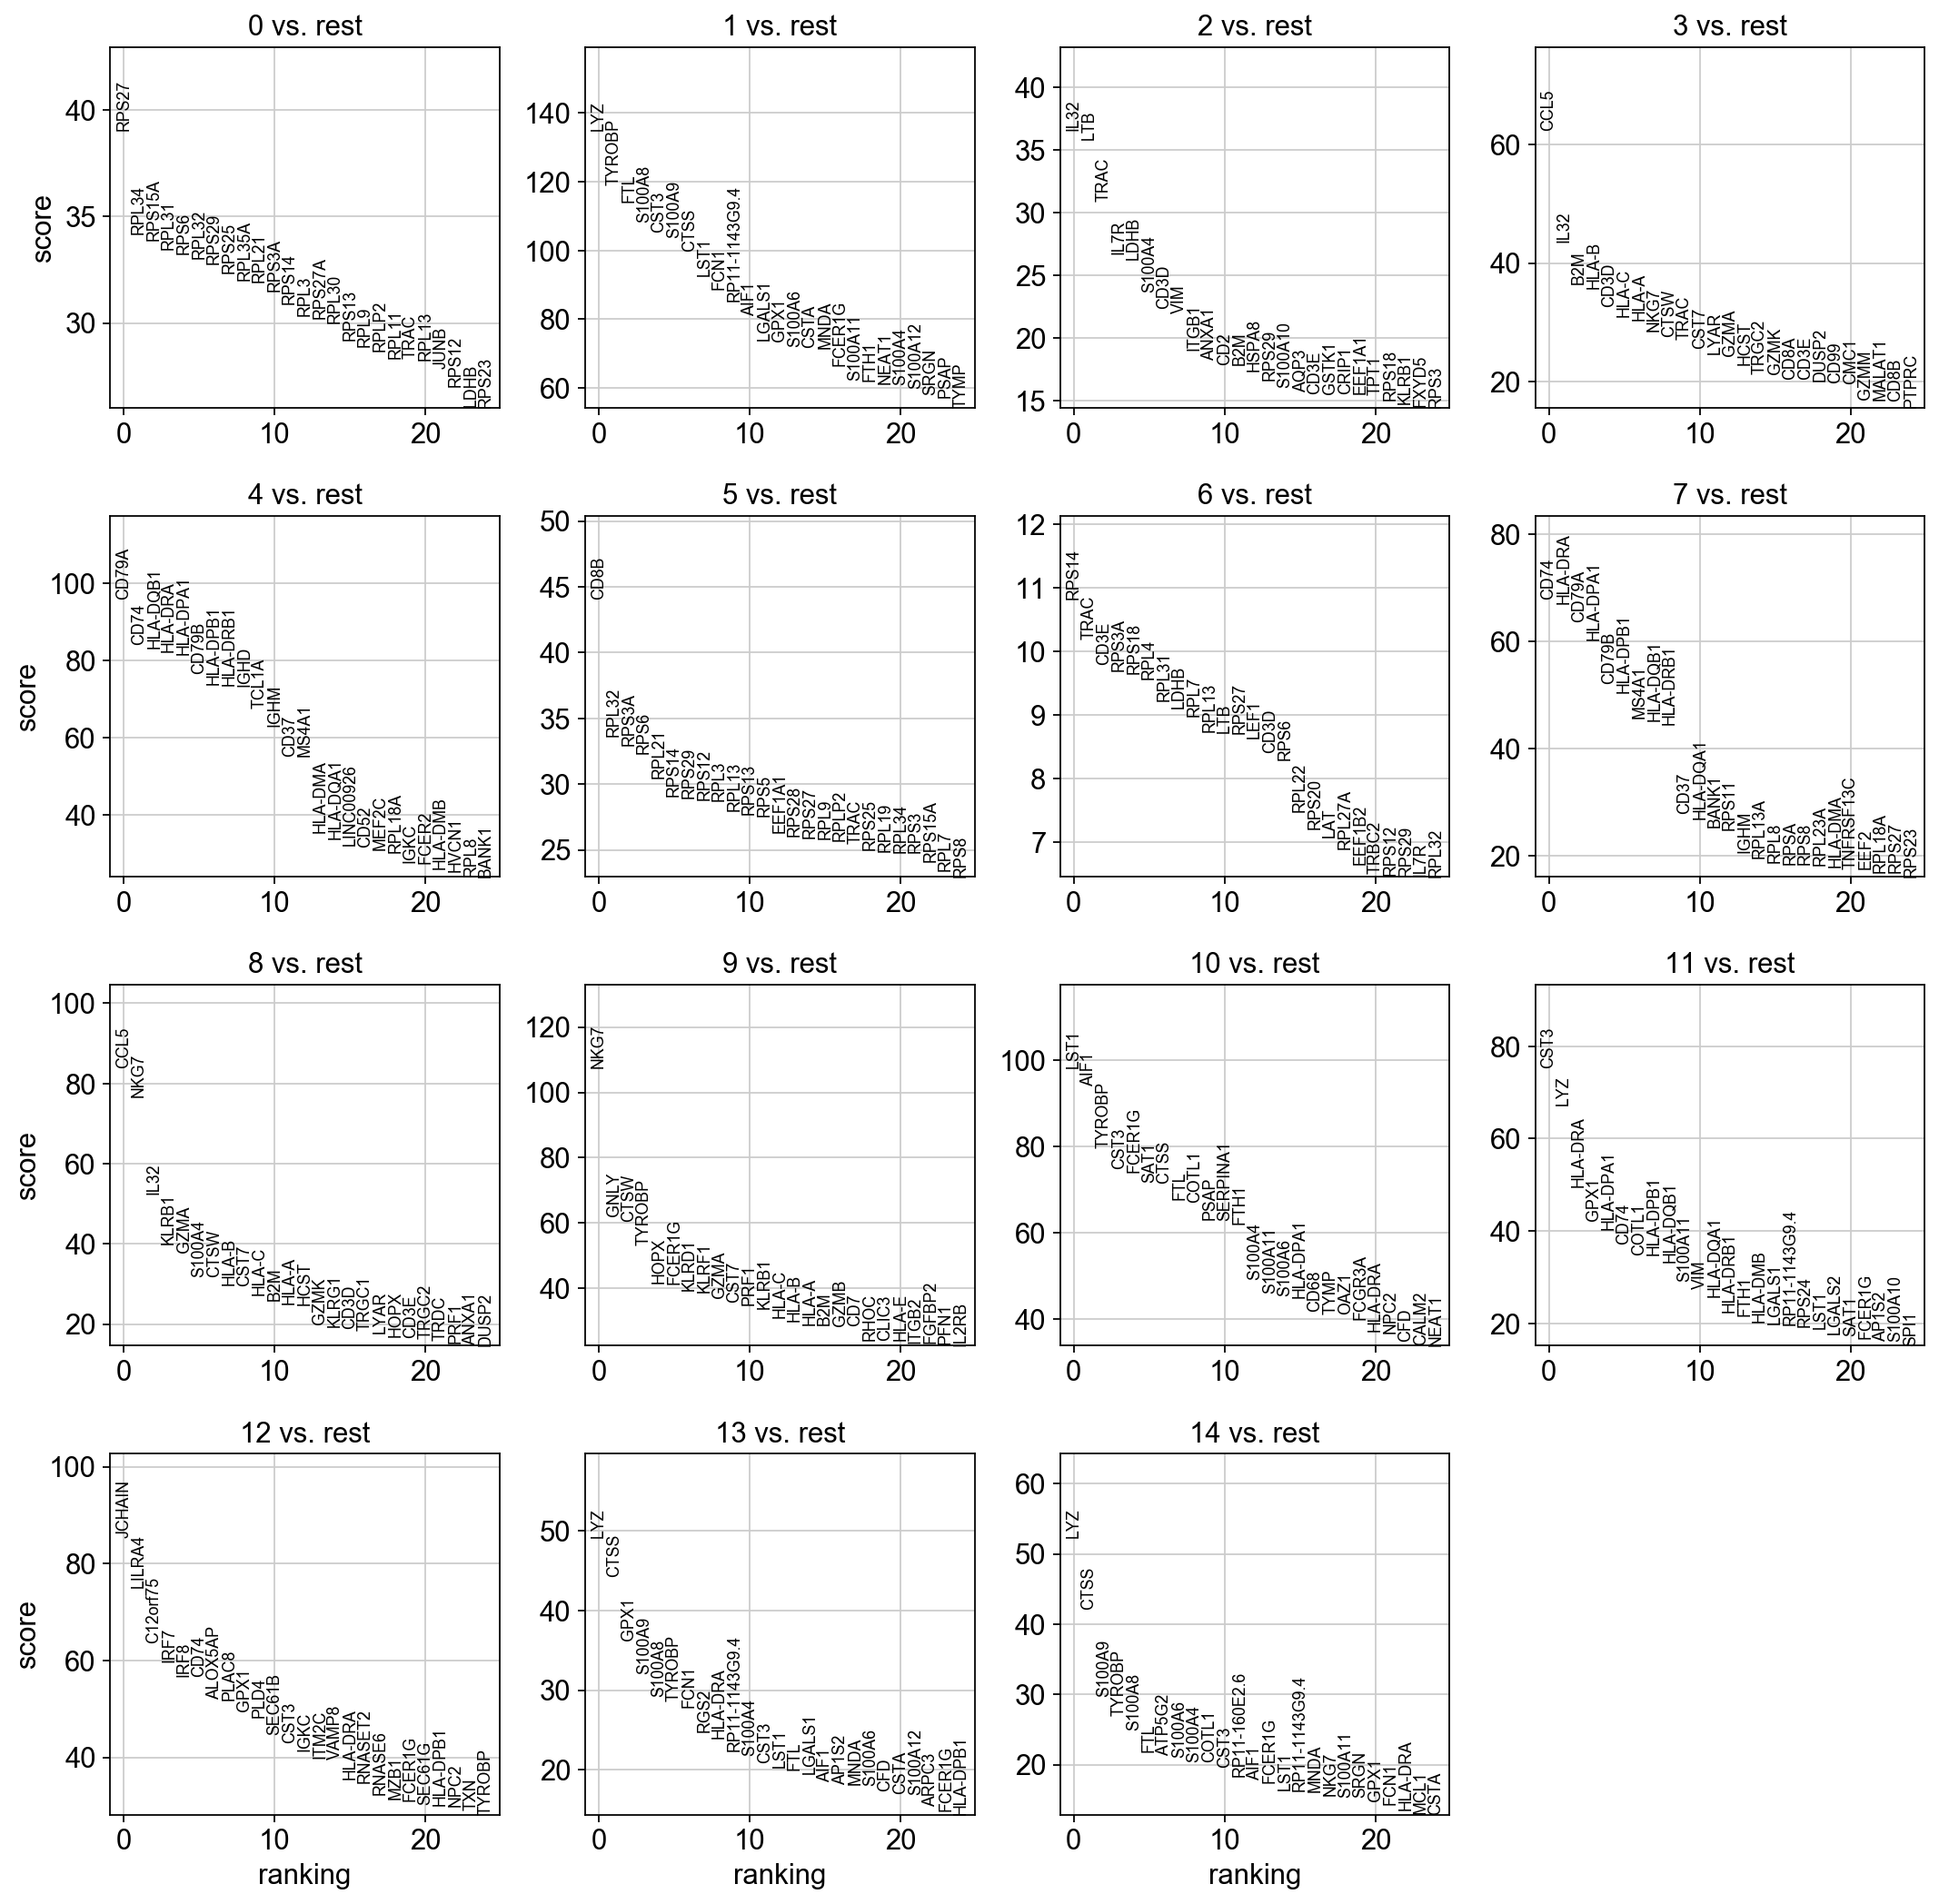

In [48]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [49]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:09)


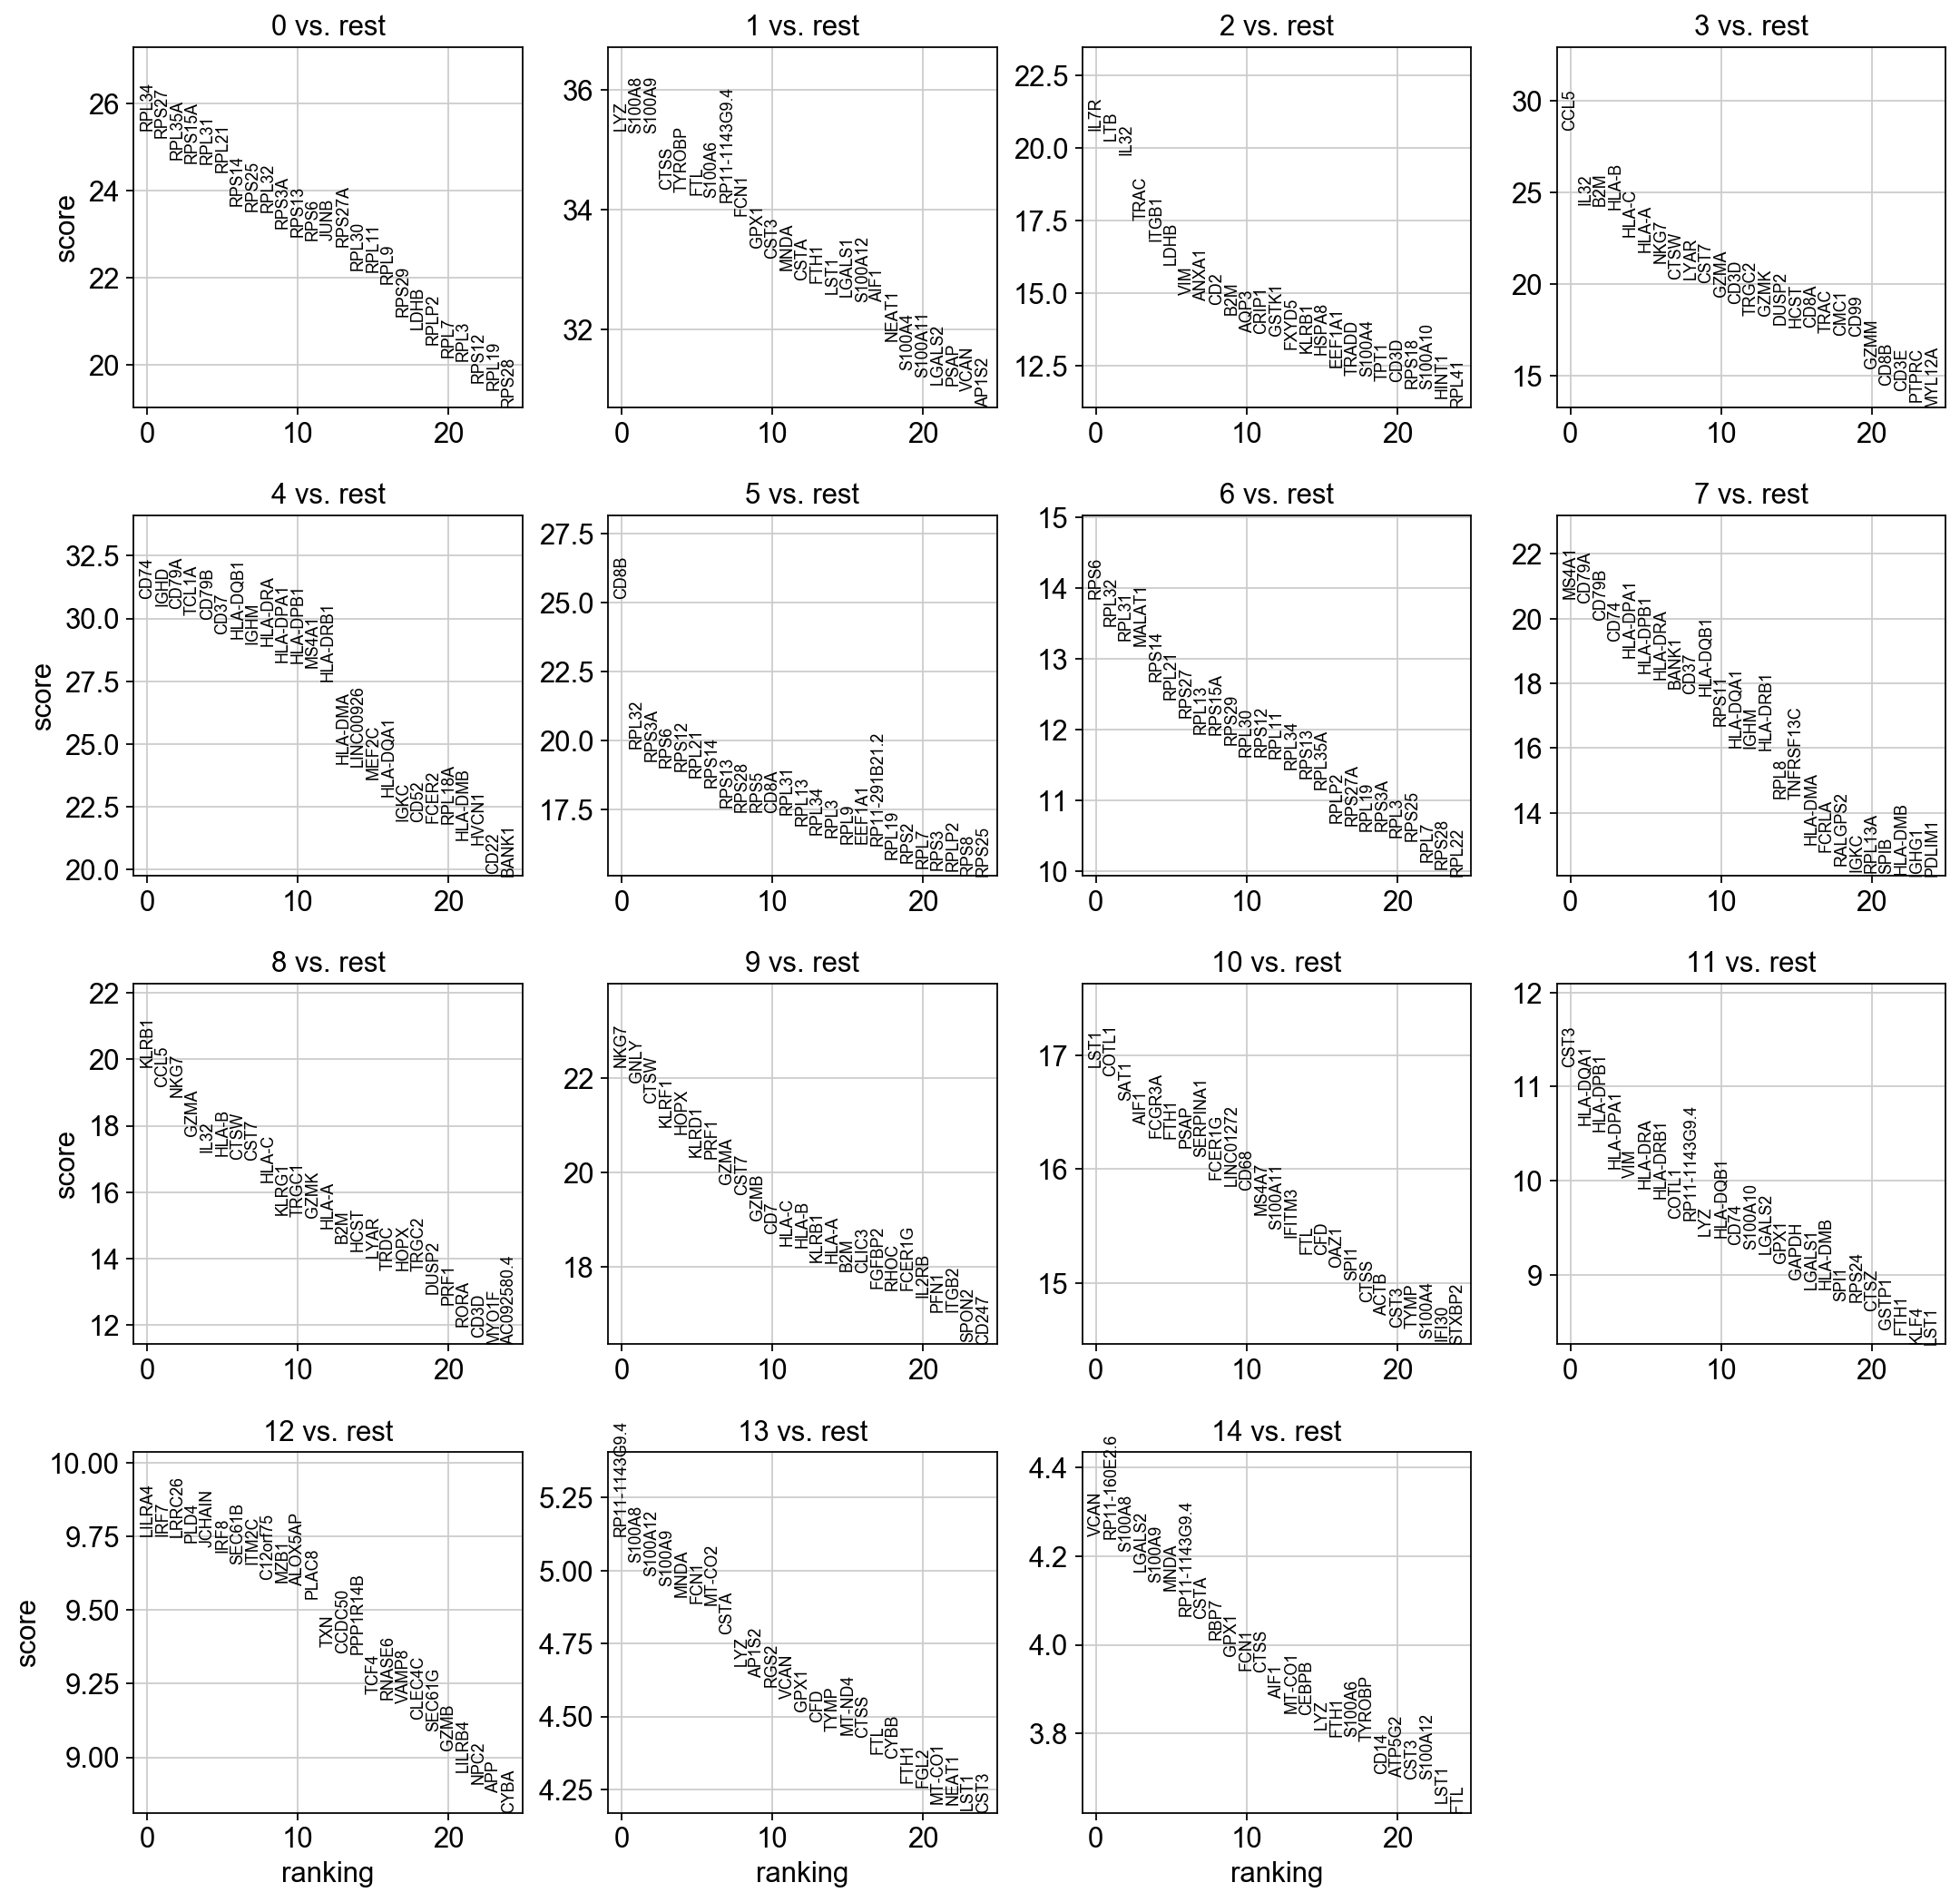

In [50]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes


/Users/kathrynwhyte/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


    finished (0:00:28)


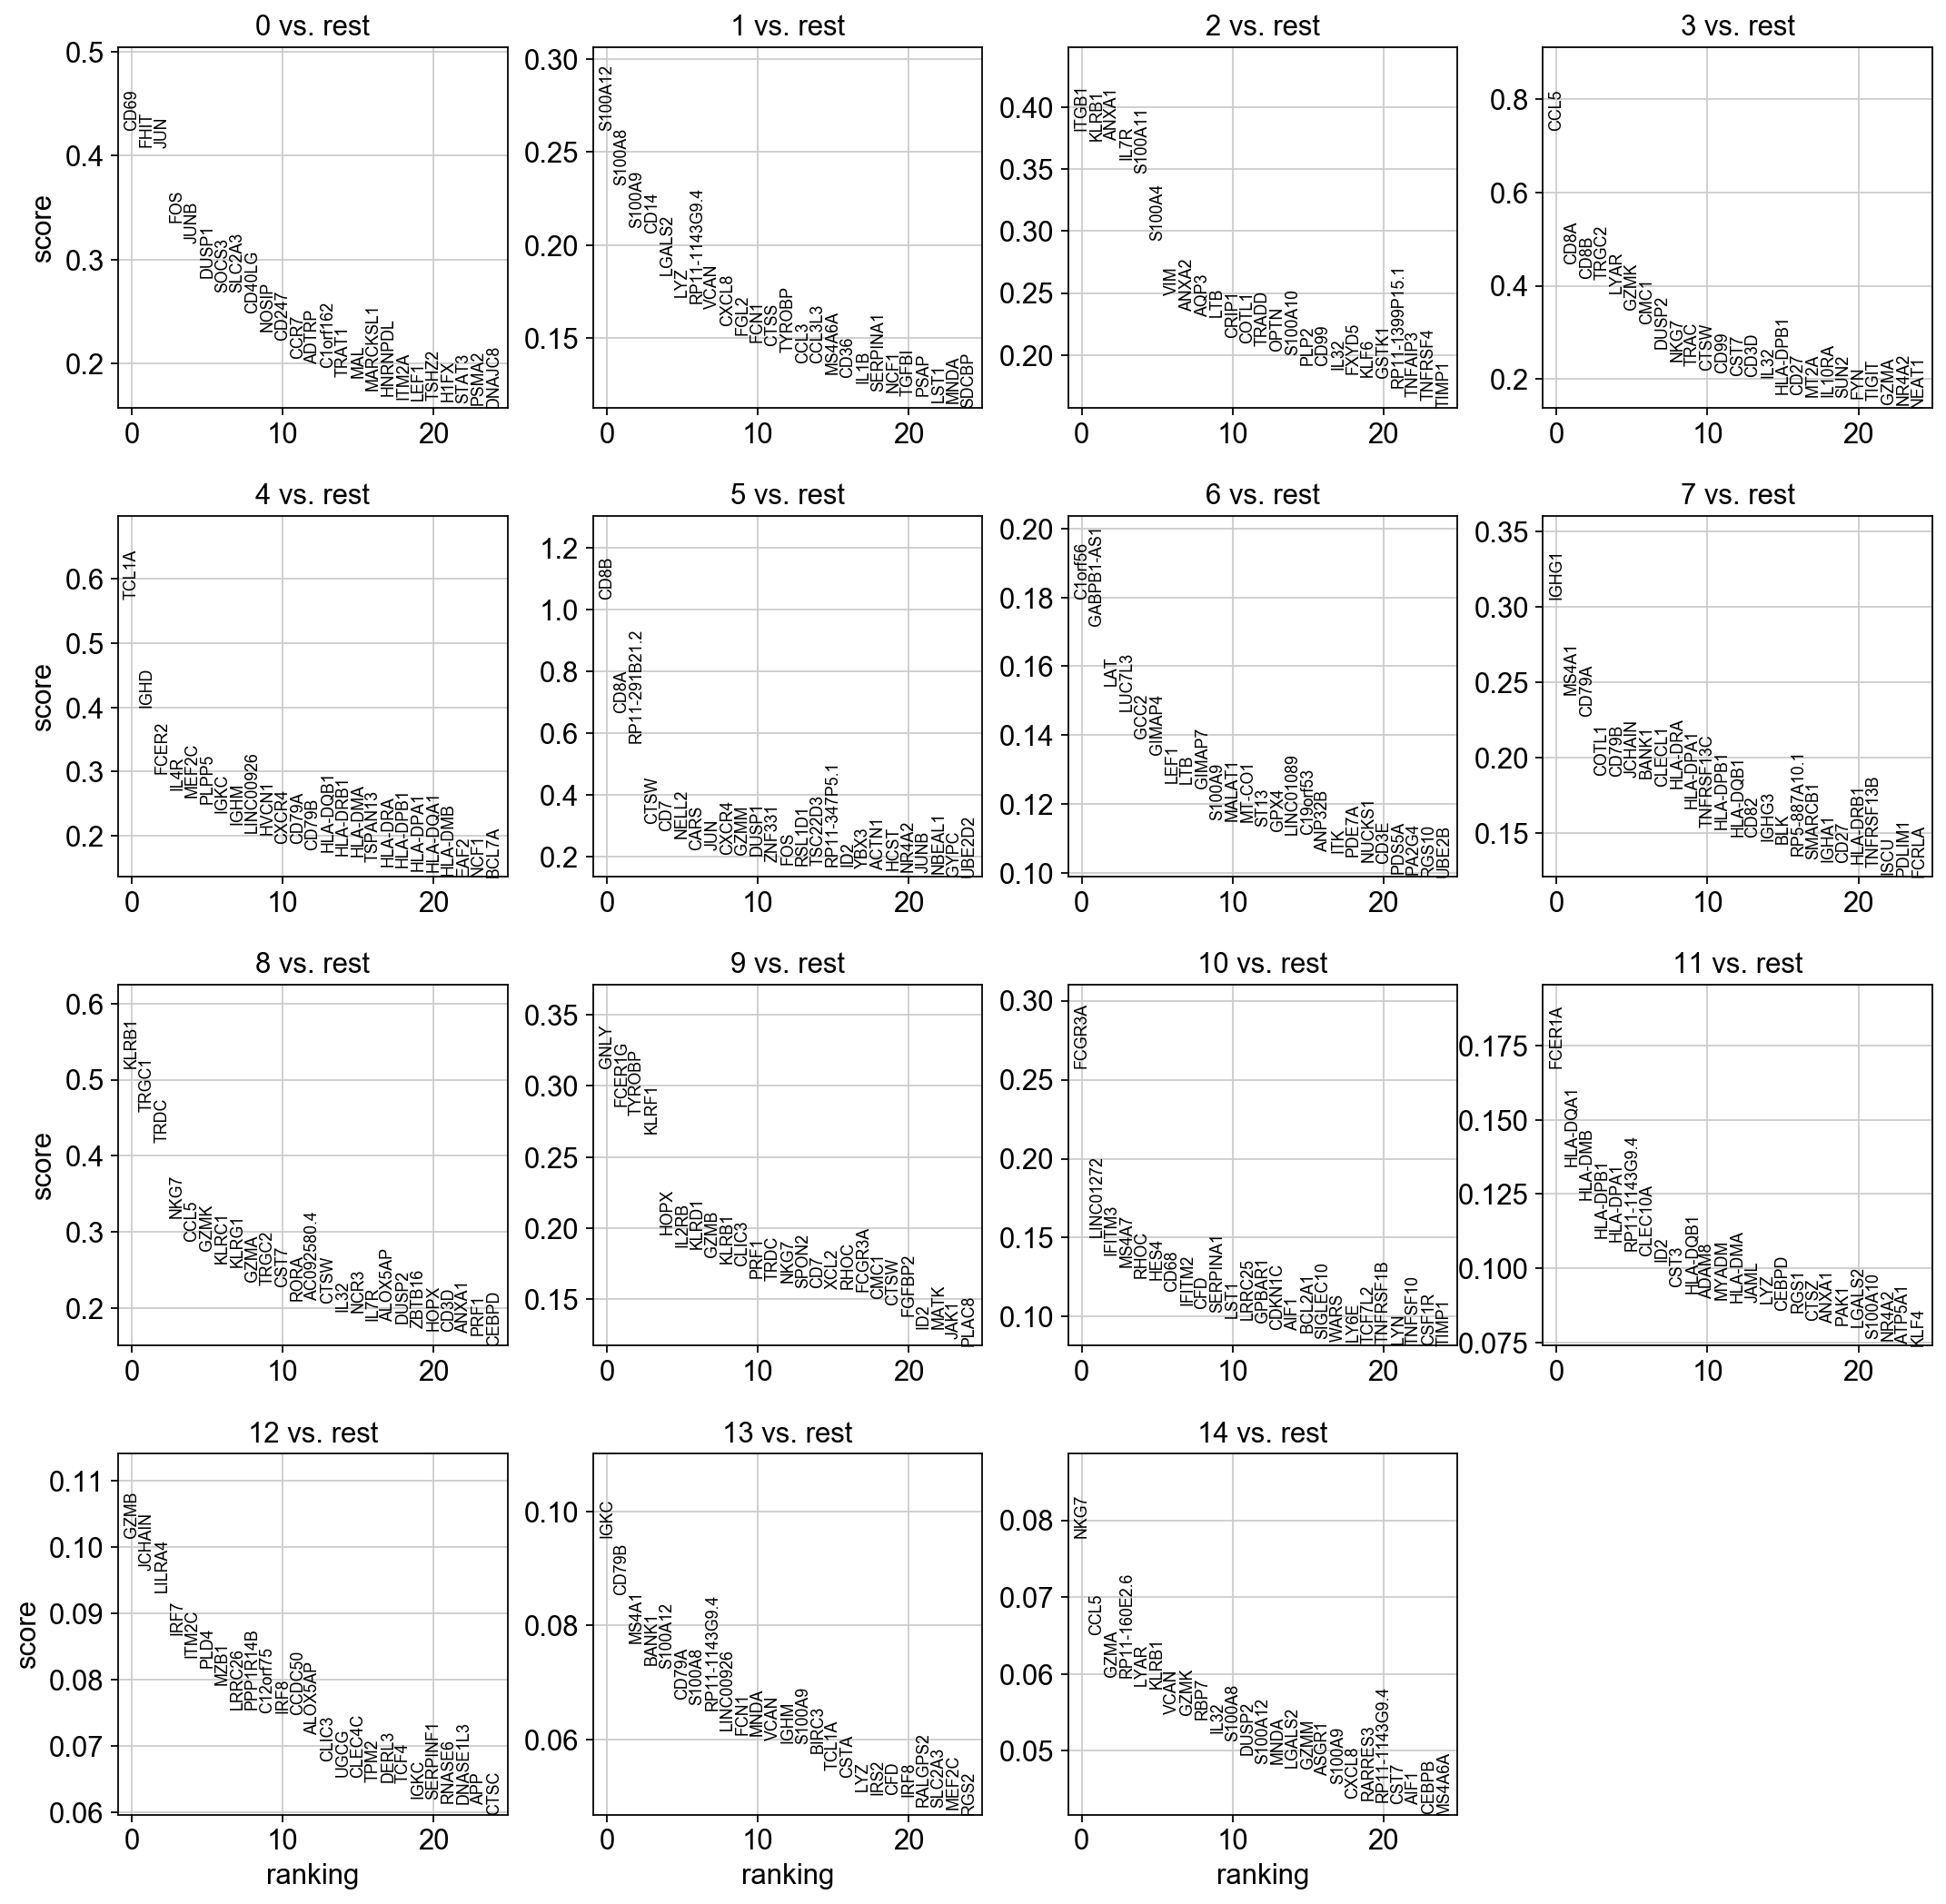

In [51]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [52]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [53]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0        1        2      3      4              5           6      7  \
0  CD69  S100A12    ITGB1   CCL5  TCL1A           CD8B     C1orf56  IGHG1   
1  FHIT   S100A8    KLRB1   CD8A   IGHD           CD8A  GABPB1-AS1  MS4A1   
2   JUN   S100A9    ANXA1   CD8B  FCER2  RP11-291B21.2         LAT  CD79A   
3   FOS     CD14     IL7R  TRGC2   IL4R           CTSW      LUC7L3  COTL1   
4  JUNB   LGALS2  S100A11   LYAR  MEF2C            CD7        GCC2  CD79B   

       8       9         10        11      12       13            14  
0  KLRB1    GNLY     FCGR3A    FCER1A    GZMB     IGKC          NKG7  
1  TRGC1  FCER1G  LINC01272  HLA-DQA1  JCHAIN    CD79B          CCL5  
2   TRDC  TYROBP     IFITM3   HLA-DMB  LILRA4    MS4A1          GZMA  
3   NKG7   KLRF1      MS4A7  HLA-DPB1    IRF7    BANK1  RP11-160E2.6  
4   CCL5    HOPX       RHOC  HLA-DPA1   ITM2C  S100A12          LYAR

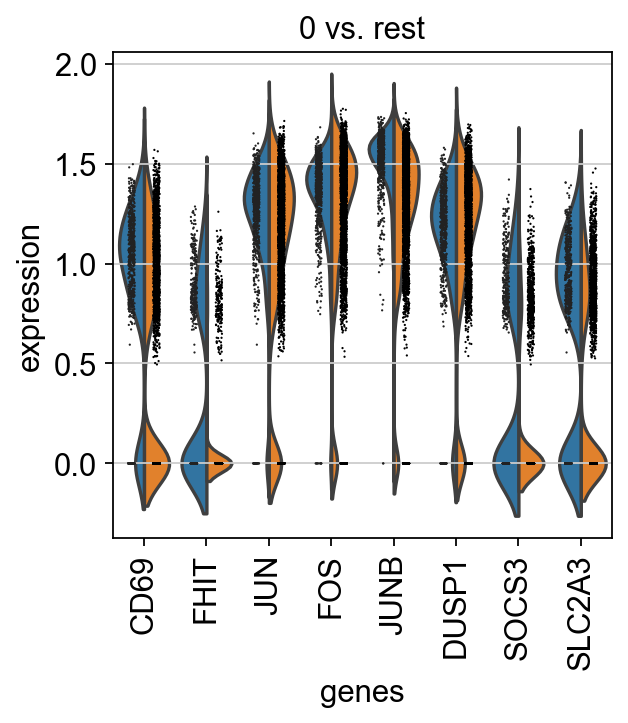

In [55]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

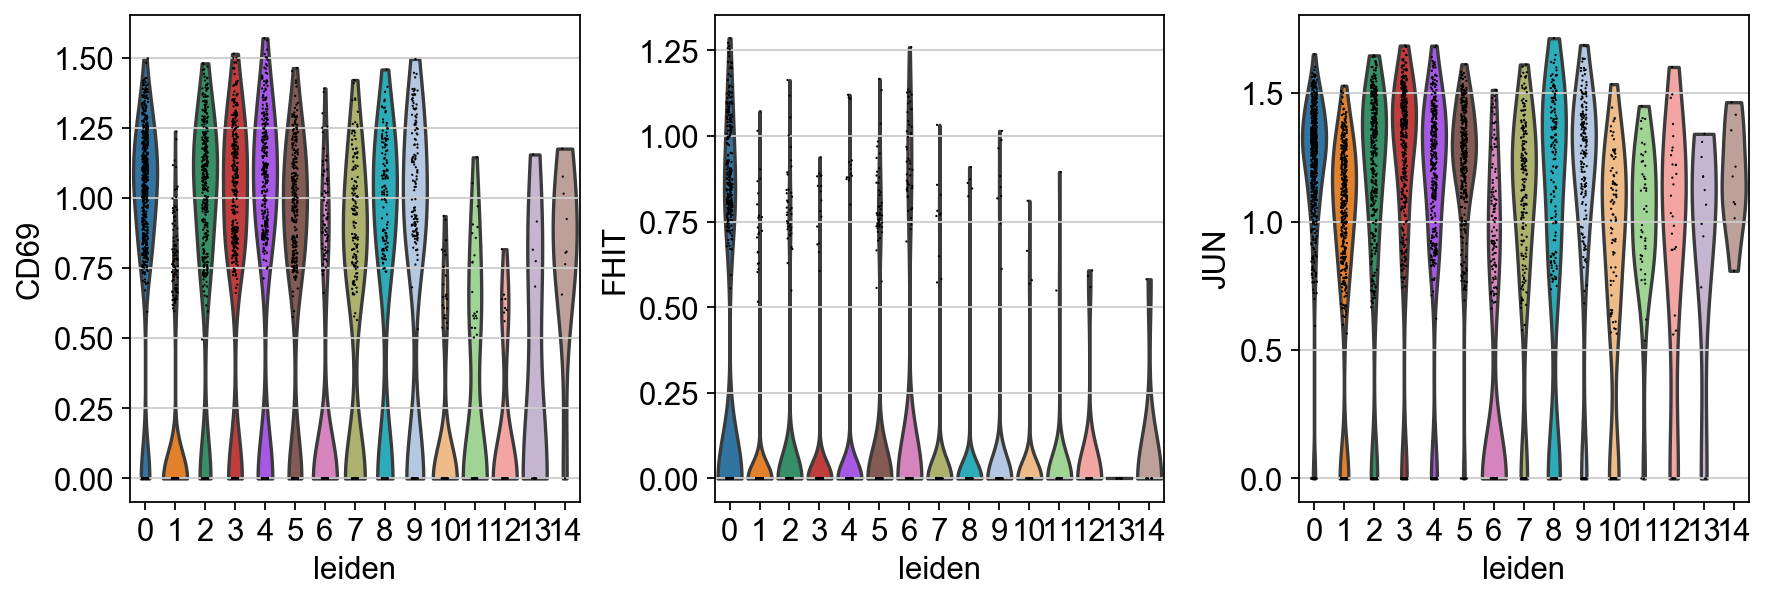

In [56]:
sc.pl.violin(adata, ['CD69', 'FHIT', 'JUN'], groupby='leiden')

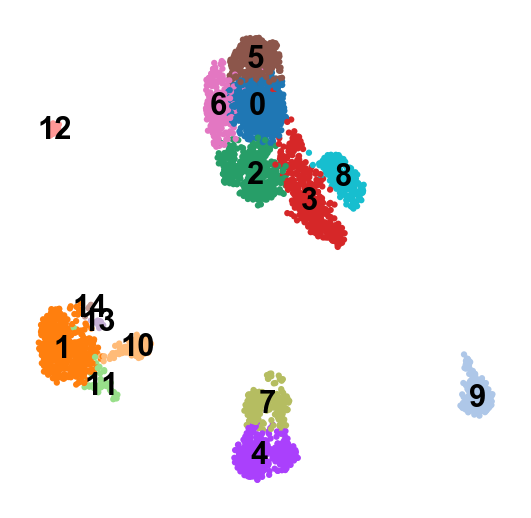

In [60]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

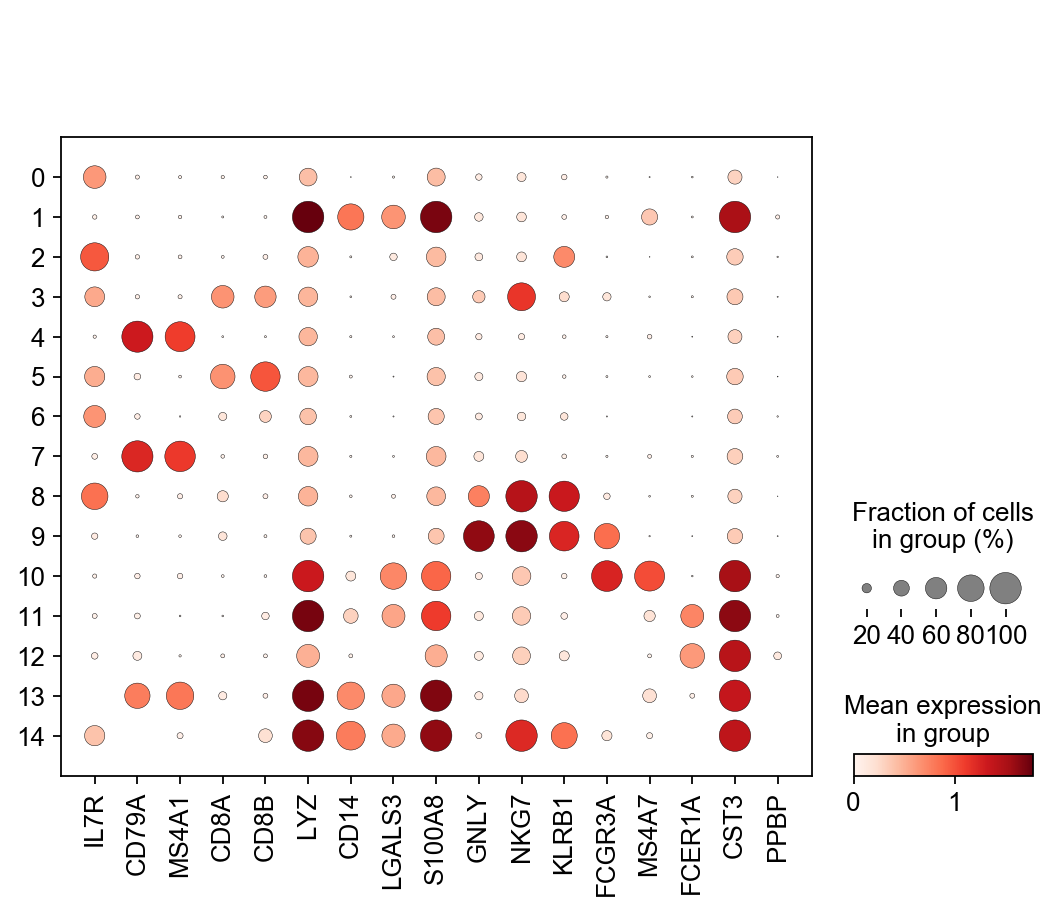

In [61]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

Q3 Regress out library size using a linear regression model and redo Q2. Explain if/why you used a regularizer

In [62]:
adata = adata[:, adata.var.highly_variable]

In [63]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:08)


In [64]:
sc.pp.scale(adata, max_value=10)

In [65]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


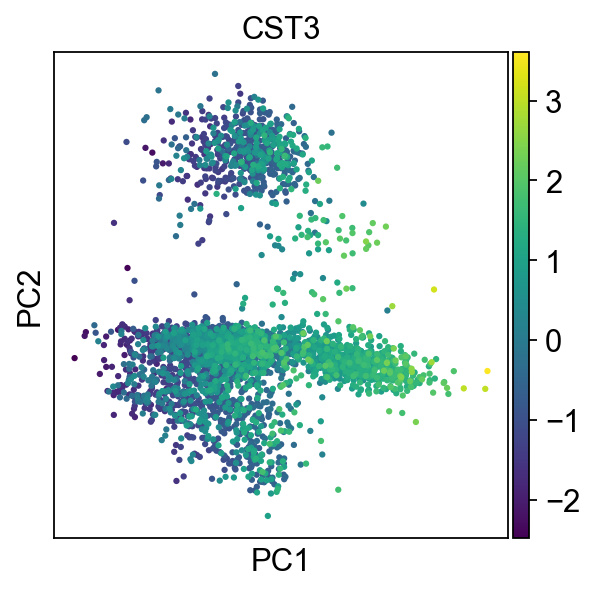

In [66]:
sc.pl.pca(adata, color='CST3')

In [67]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


In [68]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:08)


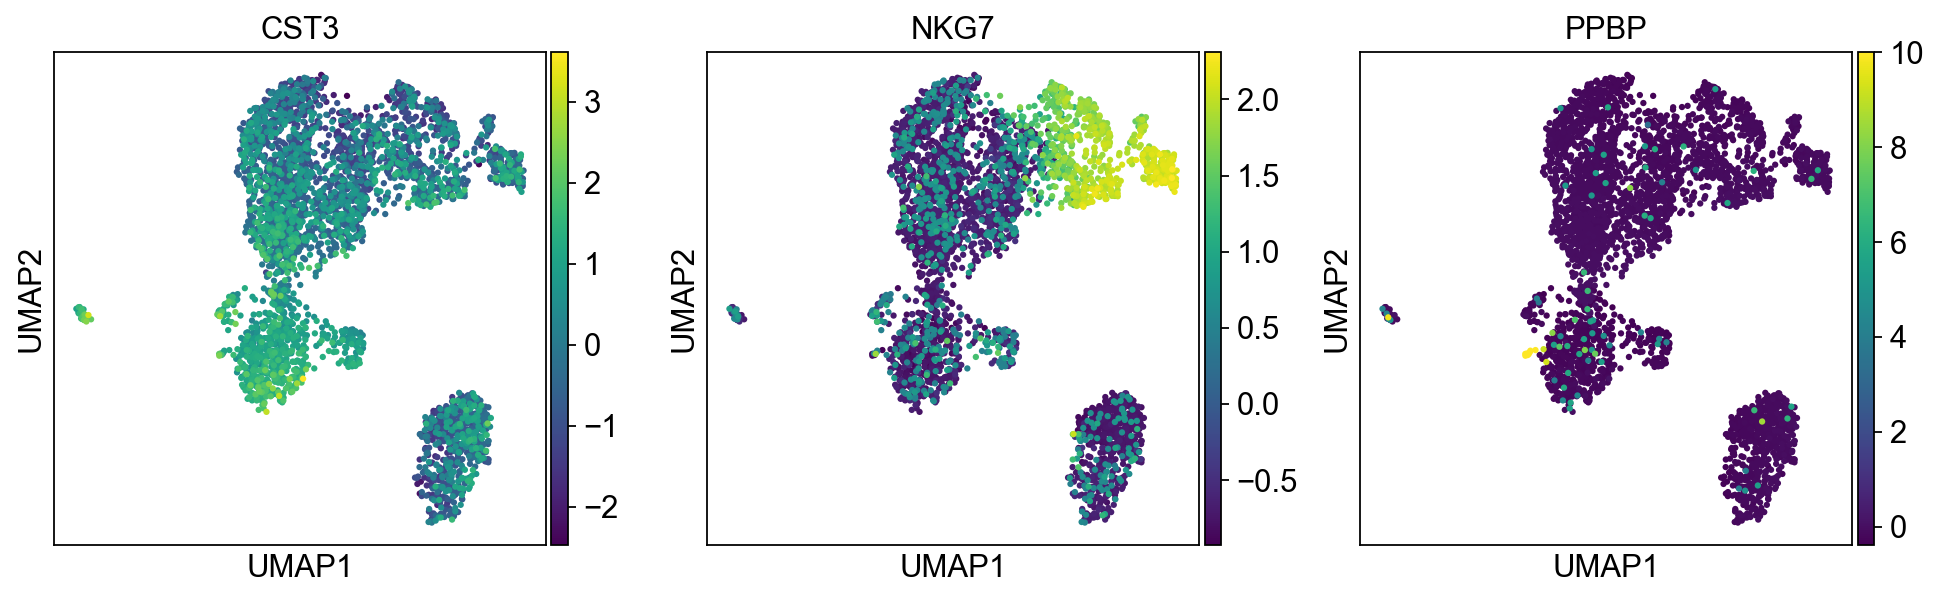

In [69]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

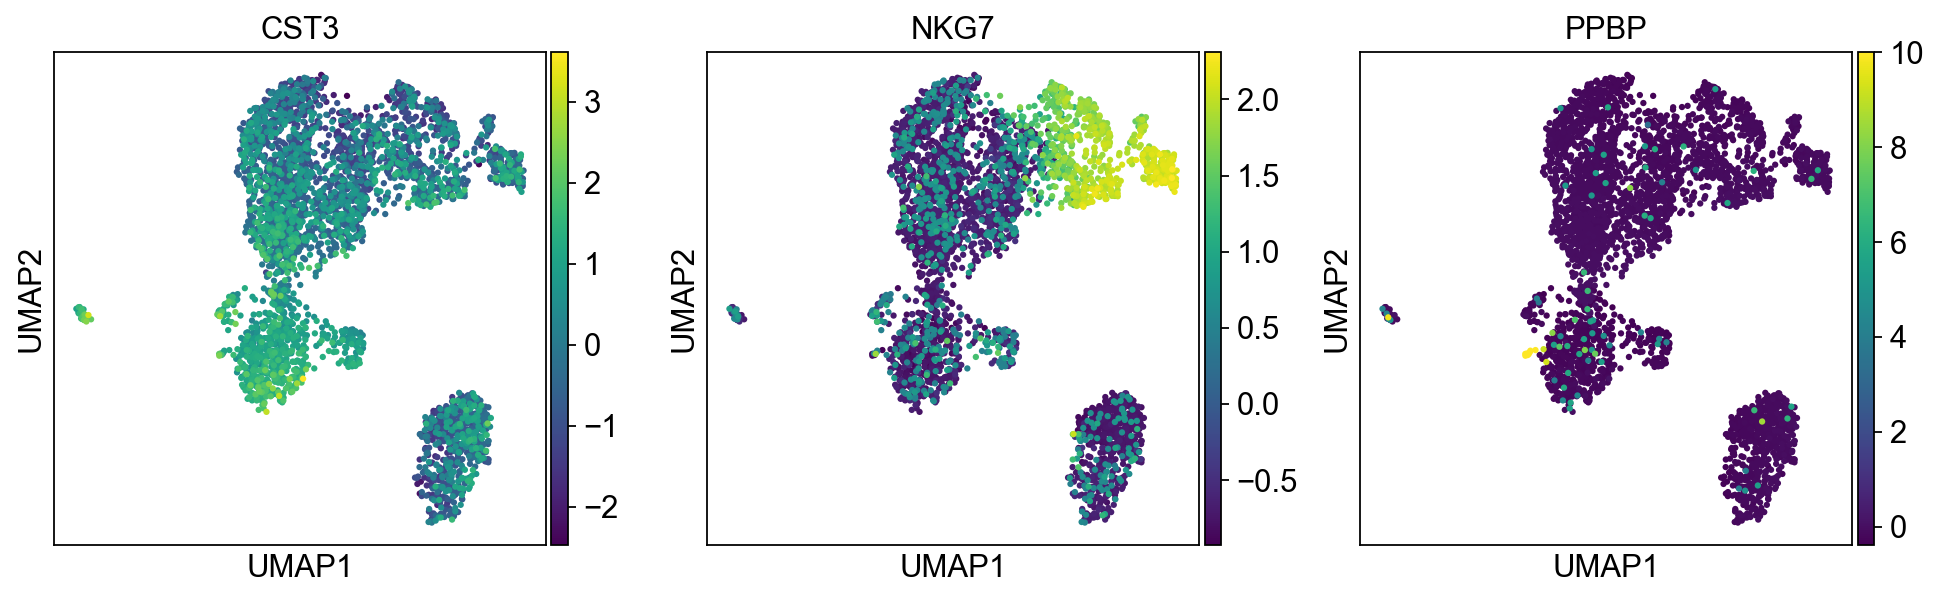

In [70]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [71]:
sc.tl.leiden(adata)

running Leiden clustering
    finished (0:00:00)


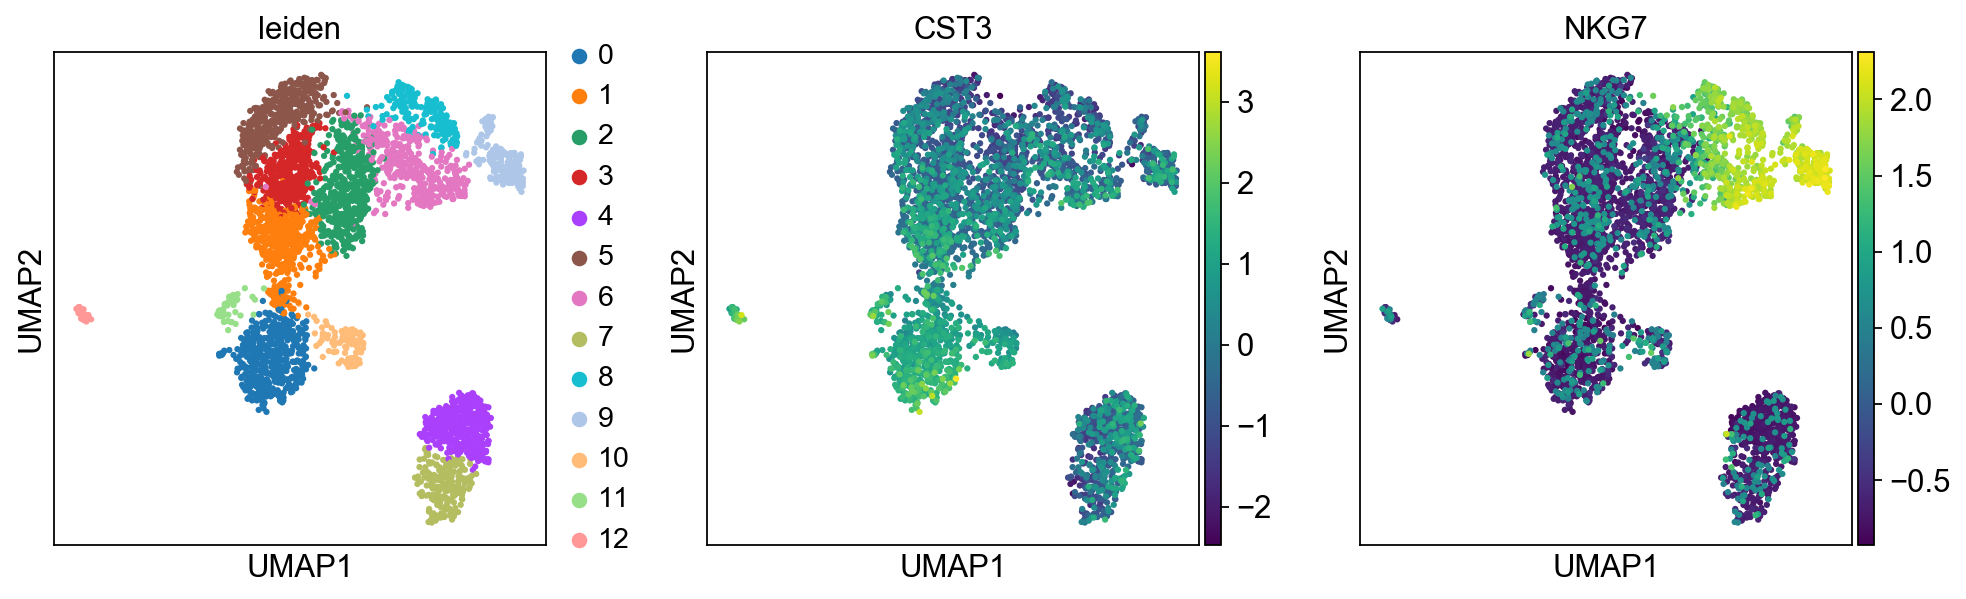

In [72]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

Q4 Solve problem 3.12 of <https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf>

We saw in Section 2.3.6 that the conjugate prior for a Gaussian distribution
with unknown mean and unknown precision (inverse variance) is a normal-gamma
distribution. This property also holds for the case of the conditional Gaussian distribution p(t|x, w, β) of the linear regression model. If we consider the likelihood
function (3.10), then the conjugate prior for w and β is given by
p(w, β) = N (w|m0, β−1S0)Gam(β|a0, b0). (3.112)

Show that the corresponding posterior distribution takes the same functional form,
so that
p(w, β|t) = N (w|mN , β−1SN )Gam(β|aN , bN ) (3.113)
and find expressions for the posterior parameters mN , SN , aN , and bN .